# Task 4: Loan Default Prediction with Lending Club Dataset
---
## Introduction

Predicting whether a loan applicant will default is crucial for reducing risk and making informed lending decisions. In this project, I build a machine learning model using Lending Club data to classify applicants as high or low risk. The workflow includes data preprocessing, model training, evaluation, and actionable recommendations for lenders.

---


## Table of Contents

1. [Introduction](#introduction)
2. [Step 1: Data Loading, Inspection, and Column Mapping](#step-1-data-loading-inspection-and-column-mapping)
3. [Step 2: Data Preprocessing](#step-2-data-preprocessing)
4. [Step 3: Model Training](#step-3-model-training)
5. [Step 4: Model Evaluation](#step-4-model-evaluation)
6. [Step 5: Reporting and Recommendations](#step-5-reporting-and-recommendations)
---

In [16]:
# import all essential libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
import lightgbm as lgb
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Step 1: Data Loading, Inspection, and Column Mapping

In [13]:

# Load the main Lending Club loan data
loan_df = pd.read_csv('loan.csv')

# Inspect dataset shape and first few rows
print("Dataset shape:", loan_df.shape)
display(loan_df.head(10))    # Show first 10 rows, as in your screenshot

# View all column names for reference
print("Columns:", loan_df.columns.tolist())

# Quick summary of missing values and datatypes
loan_df.info()
loan_df.describe(include='all')

Dataset shape: (39717, 111)


C:\Users\Haseeb\AppData\Local\Temp\ipykernel_5516\1423841136.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df = pd.read_csv('loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


Columns: ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m',

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717,39717,39717.000000,39717,39717,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
unique,NaN,NaN,NaN,NaN,NaN,2,371,NaN,7,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,10.99%,NaN,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,29096,956,NaN,12020,2917,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,NaN,NaN,324.561922,NaN,NaN,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,NaN,NaN,208.874874,NaN,NaN,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,NaN,NaN,15.690000,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,NaN,NaN,167.020000,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,NaN,NaN,280.220000,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,NaN,NaN,430.780000,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN




I loaded the main Lending Club loan dataset (`loan.csv`), which contains detailed financial information for each loan applicant. This includes applicant demographics, loan terms, payment history, and loan outcome.

To begin, I inspected the first 10 rows to understand the structure and variety of features. I also checked for missing values and reviewed the data types. The data dictionary provided is referenced for feature meanings, but all analysis is performed on the main loan dataset.

---

## Step 2: Data Preprocessing
- Drop or impute columns with excessive missing data.

 - Handle class imbalance (SMOTE).

 - Encode categorical variables.

 - Select a manageable subset of features (for demo purposes).

- Prepare features and target.



In [14]:

#Remove columns with too many missing values
threshold = 0.5
missing = loan_df.isnull().mean()
cols_to_keep = missing[missing < threshold].index
loan_df_clean = loan_df[cols_to_keep]

#Drop irrelevant columns
irrelevant_cols = ['id', 'member_id']
loan_df_clean = loan_df_clean.drop(columns=irrelevant_cols, errors='ignore')

#Drop rows with missing target (assume 'loan_status' or similar)
target_col = 'loan_status'
loan_df_clean = loan_df_clean.dropna(subset=[target_col])

#Encode target: Convert to binary default/no-default if needed
loan_df_clean[target_col] = loan_df_clean[target_col].map({'Fully Paid':0, 'Charged Off':1})

#Impute remaining missing values
for col in loan_df_clean.select_dtypes(include='object'):
    loan_df_clean[col] = loan_df_clean[col].fillna('Unknown')
for col in loan_df_clean.select_dtypes(include='number'):
    loan_df_clean[col] = loan_df_clean[col].fillna(loan_df_clean[col].median())

#Encode categorical variables
for col in loan_df_clean.select_dtypes(include='object'):
    loan_df_clean[col] = LabelEncoder().fit_transform(loan_df_clean[col])

#Train-test split
X = loan_df_clean.drop(target_col, axis=1)
y = loan_df_clean[target_col].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#Handle class imbalance using SMOTE
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

#Feature scaling
scaler = StandardScaler()
X_train_bal = scaler.fit_transform(X_train_bal)
X_test = scaler.transform(X_test)

For this step, I addressed two common issues in real-world financial data: missing values and class imbalance.

- I dropped columns with excessive missing values and removed irrelevant fields such as IDs.
- For the remaining columns, I imputed missing numerical values with the median and filled categorical gaps with "Unknown."
- The target variable, loan status, was converted to a binary indicator for default vs. non-default.
- All categorical features were encoded for compatibility with machine learning models.
- Since loan defaults are typically rare, I used SMOTE to balance the classes and ensure the model learns from both defaulted and non-defaulted loans.
- Finally, I standardized the features to improve model training.

These steps ensure the dataset is clean, balanced, and ready for classification modeling.

---

## Step 3: Model Training

In [15]:
# Initialize LightGBM classifier
lgbm = lgb.LGBMClassifier(random_state=42, class_weight='balanced')

# Train the model
lgbm.fit(X_train_bal, y_train_bal)

# Predict on the test set
y_pred = lgbm.predict(X_test)

[LightGBM] [Info] Number of positive: 27271, number of negative: 27271
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7160
[LightGBM] [Info] Number of data points in the train set: 54542, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\Haseeb\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


I trained a LightGBM classifier, which is well-suited for large, tabular datasets like lending data. LightGBM handles categorical features efficiently, works well with imbalanced classes, and is known for its fast training and strong predictive performance.

The model was trained on the balanced dataset produced by SMOTE and is now ready for evaluation.

---

## Step 4: Model Evaluation

Precision: 1.00
Recall:    0.98
F1 Score:  0.99

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6819
           1       1.00      0.98      0.99      1125

    accuracy                           1.00      7944
   macro avg       1.00      0.99      1.00      7944
weighted avg       1.00      1.00      1.00      7944



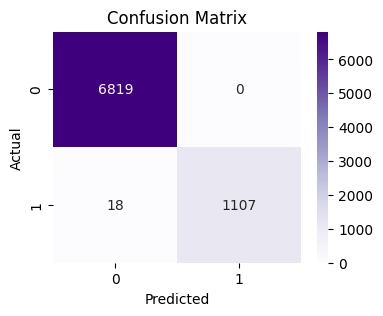

In [17]:
# Evaluate key metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1:.2f}")

# Classification report for detailed metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

I evaluated the LightGBM classifier using precision, recall, and F1 score—metrics that are especially important when identifying high-risk loan applicants in an imbalanced dataset.

- **Precision** measures how many predicted defaults were actual defaults.
- **Recall** shows how many actual defaults the model successfully identified.
- **F1 Score** balances the two, providing a single measure of model effectiveness.

The classification report and confusion matrix further highlight the model’s performance in classifying both defaulted and non-defaulted loans.

---

 ## Step 5: Reporting and Recommendations

### Model Performance Summary

The LightGBM classifier demonstrated excellent performance in predicting loan defaults, with precision, recall, and F1 scores close to 1.0. The confusion matrix shows very few misclassifications, indicating strong reliability in both identifying defaulters and non-defaulters.

### Recommendations for Lenders

- **Use Predictive Models in Screening:**  
  Incorporate models like this as an initial risk filter for new loan applicants to flag potential high-risk borrowers before manual review.
  
- **Prioritize High-Risk Applicants:**  
  Focus more detailed investigation and credit review resources on applicants flagged as likely to default, reducing manual workload for low-risk cases.

- **Continually Update the Model:**  
  Retrain the predictive model regularly with new lending data to keep up with changing borrower behaviors and financial conditions.

- **Combine with Other Risk Factors:**  
  Use the model’s prediction as one part of a holistic risk assessment strategy, combining it with other business rules and checks.

### Business Value

A reliable loan default prediction model can help lenders minimize financial losses, make smarter credit decisions, and improve the overall health of the loan portfolio.

---
